In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import missingno as msno 

In [2]:
data = pd.read_csv('../input/data-analyst-jobs/DataAnalyst.csv', index_col='Unnamed: 0')
print(data.shape)
data.head()

(2253, 15)


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [3]:
data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply'],
      dtype='object')

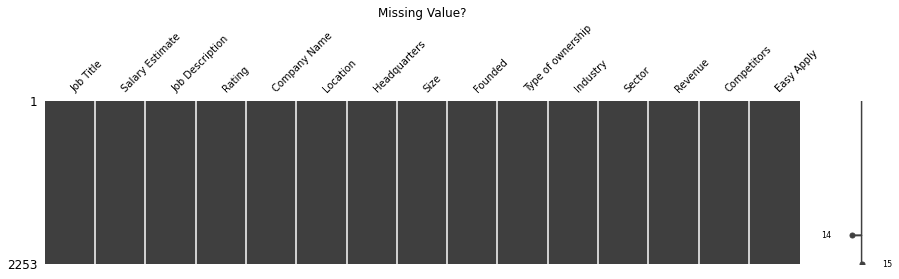

In [4]:
msno.matrix(data, figsize=(15, 3), fontsize=10)
plt.title('Missing Value?')
plt.show()

NO missing Values

## Job Title

In [5]:
data['Job Title'] = data['Job Title'].str.lower()

banned = ['data', 'analyst']


def filter(x):
    x = x.replace('/', " ").replace("-", " ")
    return ' '.join([item for item in x.split() if item not in banned])


data["filter1"] = data["Job Title"].apply(filter)

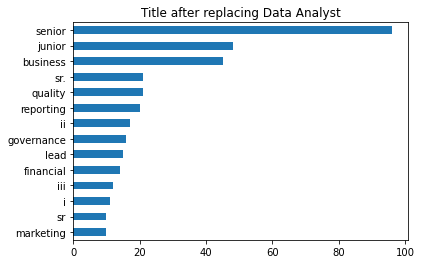

In [6]:
data.filter1.value_counts()[1:15].sort_values(ascending=True).plot(
    kind='barh', title='Title after replacing Data Analyst')

plt.show()

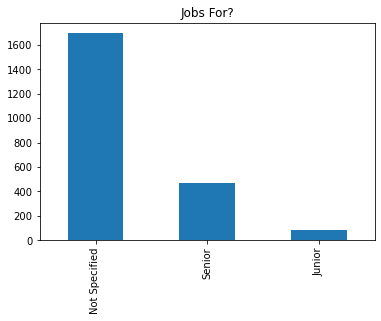

In [7]:
junior = ['jr.', 'junior', 'entry', 'intern', 'jr']
senior = ['sr.', 'senior', 'lead', 'sr']


def check(x):
    for item in x.split():
        if item in junior:
            return 'Junior'
        elif item in senior:
            return 'Senior'
    return 'Not Specified'


data['experience'] = data["filter1"].apply(check)
data.experience.value_counts().plot(kind='bar', title='Jobs For?')
plt.show()

In [8]:
data.query('experience == "Junior"')['Job Title'].value_counts()[:5]

junior data analyst      30
data analyst junior      17
data analyst intern       4
data analyst â junior     2
jr. data analyst          2
Name: Job Title, dtype: int64

## Salary Estimate

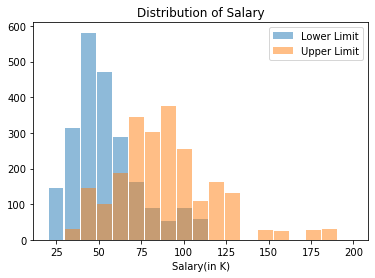

In [9]:
data[['Salary_lowerlimit', 'Salary_upperlimit']] = data['Salary Estimate'].str.split().str.get(0).str.split("-", expand = True)

data.Salary_lowerlimit = data.Salary_lowerlimit.apply(lambda x: x[1:-1])
data.Salary_upperlimit = data.Salary_upperlimit.apply(lambda x: x[1:-1])

oddoneout = data.query('Salary_lowerlimit == ""').index[0] ## this data have salary estimate -1
lowermean = data[data.index != oddoneout].Salary_lowerlimit.astype('int').mean()
uppermean = data[data.index != oddoneout].Salary_upperlimit.astype('int').mean()

data.at[oddoneout, 'Salary_lowerlimit'] = lowermean
data.at[oddoneout, 'Salary_upperlimit'] = uppermean

data.Salary_lowerlimit = data.Salary_lowerlimit.astype('int')
data.Salary_upperlimit = data.Salary_upperlimit.astype('int')


bins = np.linspace(20, 200, 20)
plt.hist(data.Salary_lowerlimit, bins, alpha=0.5, label='Lower Limit', rwidth=0.93)
plt.hist(data.Salary_upperlimit, bins, alpha=0.5, label='Upper Limit', rwidth=0.93)
plt.legend(loc='upper right')
plt.title('Distribution of Salary')
plt.xlabel('Salary(in K)')
plt.show()

In [10]:
data.groupby('experience').agg({'Salary_lowerlimit': ['mean', 'median', 'max', 'min'], 'Salary_upperlimit' : ['mean', 'median', 'max', 'min']})

Salary_lowerlimit                 Salary_upperlimit              \
                           mean median  max min              mean median  max   
experience                                                                      
Junior                50.079545     43  113  24         82.613636     78  190   
Not Specified         53.897345     50  113  24         89.487906     86  190   
Senior                56.382979     51  113  26         93.127660     92  190   

                   
              min  
experience         
Junior         42  
Not Specified  38  
Senior         42

max salary for junior is 190 OK.....

## Company Name

In [11]:
data['Company_name_strip'] = data['Company Name'].str.split('\n').str.get(0)


print("Total No. of Companies - " , (data['Company Name'].nunique()))
print("Total No. of Companies after strip - " , (data['Company_name_strip'].nunique()))

Total No. of Companies -  1513
Total No. of Companies after strip -  1501


So 12 company has duplicate name

In [12]:
df = data.groupby(['Company_name_strip']).agg({'Company Name' : 'nunique'})
duplicate_name = df[df["Company Name"] > 1].index
print(duplicate_name)

Index(['Abacus Service Corporation', 'Assembly', 'BOLD', 'CASES', 'Leap',
       'Mondo', 'PROLIM Global Corporation', 'Randstad', 'RiverPoint',
       'Source of Future Technology Inc', 'Village Care',
       'Xoriant Corporation'],
      dtype='object', name='Company_name_strip')


In [13]:
data[data.Company_name_strip.isin(duplicate_name)].groupby(
    ['Company_name_strip', "Company Name", 'Location', "Headquarters"]).size()

Company_name_strip               Company Name                          Location                  Headquarters          
Abacus Service Corporation       Abacus Service Corporation\n4.2       New York, NY              Southfield, MI            1
                                                                       Salt Lake City, UT        Southfield, MI            1
                                 Abacus Service Corporation\n4.3       Oakland, CA               Southfield, MI            1
Assembly                         Assembly\n2.6                         Austin, TX                New York, NY              1
                                 Assembly\n3.4                         Austin, TX                New York, NY              1
BOLD                             BOLD\n3.6                             San Francisco, CA         Guaynabo, PR              1
                                 BOLD\n3.7                             San Francisco, CA         Guaynabo, PR              1
CASES

Company at different place has different rating

Village Care has headquarter in UK and NY both

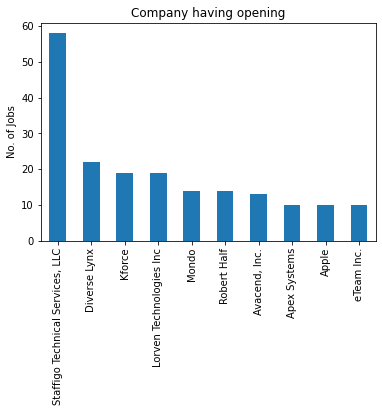

In [14]:
data['Company_name_strip'].value_counts()[:10].plot(kind = 'bar', title = "Company having opening").set(ylabel = 'No. of Jobs')
plt.show()

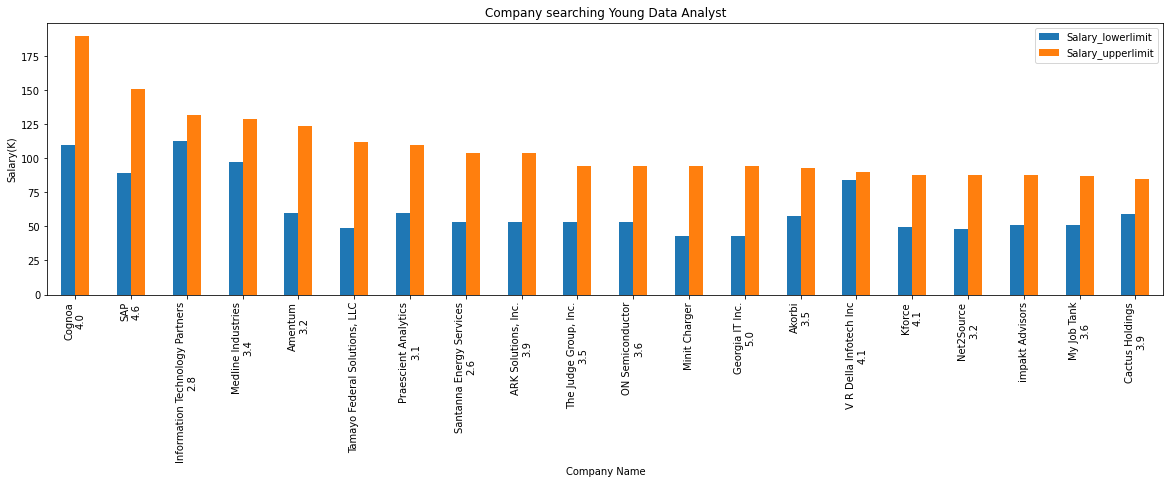

In [15]:
data.query('experience == "Junior"').groupby(['Company Name']).agg({'Salary_lowerlimit': 'mean', 'Salary_upperlimit':'mean'}
                                    ).sort_values(('Salary_upperlimit'), ascending=False)[:20].plot(kind='bar',
                                    title='Company searching Young Data Analyst', figsize=(20, 5)).set(ylabel="Salary(K)")
plt.show()

Cognoa giving high salary to junior

In [16]:
data.groupby(['Company_name_strip']).get_group('Cognoa')

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,filter1,experience,Salary_lowerlimit,Salary_upperlimit,Company_name_strip
1481,tableau data analyst intern,$110K-$190K (Glassdoor est.),--- This is a 3-6 month full-time internship o...,4.0,Cognoa\n4.0,"Palo Alto, CA","Palo Alto, CA",1 to 50 employees,-1,Company - Private,Health Care Services & Hospitals,Health Care,Unknown / Non-Applicable,-1,-1,tableau intern,Junior,110,190,Cognoa


Hmm.. Tableau

### Location

In [17]:
df = data.Location.str.split(',', expand=True)
df2 = data.Headquarters.str.split(',', expand=True)

df.loc[df[2] == ' CO', 0] = "Greenwood Village, Arapahoe"
df.loc[df[2] == ' CO', 1] = " CO"


df2.loc[df2[2] == " NY", 1] = " NY"
df2.loc[df2[1] == " 061", 1] = " NY"


data[['Place', 'State']] = df.loc[:, [0, 1]]
data[['Headquarters_place', 'Headquarters_state_or_country']] = df2.loc[:, [0, 1]]


data.State = data.State.str.split(" ").str.get(1)

In [18]:
foreign = df2[df2[1].str.len() > 3][1].unique()
data['Company_origin'] = data.Headquarters_state_or_country.apply(
    lambda x: "Foreign" if x in foreign else 'Domestic')

data.groupby('Company_origin').agg({'Company Name': 'nunique'})

,Company Name
Company_origin,
Domestic,1413
Foreign,101


Thats total 1503 but 1501 are unique company name

In [19]:
#Lets findout
oddoneout = data.groupby('Company_name_strip').agg({'Company_origin': 'nunique'}).query('Company_origin == 2').index
data[data['Company_name_strip'].isin(oddoneout)]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,filter1,experience,Salary_lowerlimit,Salary_upperlimit,Company_name_strip,Place,State,Headquarters_place,Headquarters_state_or_country,Company_origin
352,healthcare senior data analyst - hedis,$77K-$132K (Glassdoor est.),Healthcare Data Analyst - HEDIS\n\nVillageCare...,2.0,Village Care\n2.0,"New York, NY","New York, NY",501 to 1000 employees,1977,Nonprofit Organization,...,healthcare senior hedis,Senior,77,132,Village Care,New York,NY,New York,NY,Domestic
403,healthcare senior data analyst - hedis,$48K-$96K (Glassdoor est.),Job Description\nHealthcare Data Analyst - HED...,-1.0,Village Care,"New York, NY","Durham, United Kingdom",Unknown,-1,Company - Private,...,healthcare senior hedis,Senior,48,96,Village Care,New York,NY,Durham,United Kingdom,Foreign
773,data analyst,$73K-$82K (Glassdoor est.),"We are seeking a resource who loves data, anal...",-1.0,TalentDash,"Chicago, IL","Chicago, IL",1 to 50 employees,-1,Company - Private,...,,Not Specified,73,82,TalentDash,Chicago,IL,Chicago,IL,Domestic
790,data analyst,$67K-$92K (Glassdoor est.),Job Description\nWe are seeking a resource who...,-1.0,TalentDash,"Chicago, IL","Singapore, Singapore",1 to 50 employees,2014,Company - Private,...,,Not Specified,67,92,TalentDash,Chicago,IL,Singapore,Singapore,Foreign
829,it risk and compliance data reporting analyst,$42K-$76K (Glassdoor est.),"Reporting to the Supervisor, provides reportin...",-1.0,TalentDash,"Chicago, IL","Chicago, IL",1 to 50 employees,-1,Company - Private,...,it risk and compliance reporting,Not Specified,42,76,TalentDash,Chicago,IL,Chicago,IL,Domestic
875,it risk and compliance data reporting analyst,$68K-$87K (Glassdoor est.),"Job Description\nReporting to the Supervisor, ...",-1.0,TalentDash,"Chicago, IL","Singapore, Singapore",1 to 50 employees,2014,Company - Private,...,it risk and compliance reporting,Not Specified,68,87,TalentDash,Chicago,IL,Singapore,Singapore,Foreign


We found Village Care previously now one more TalentDash 

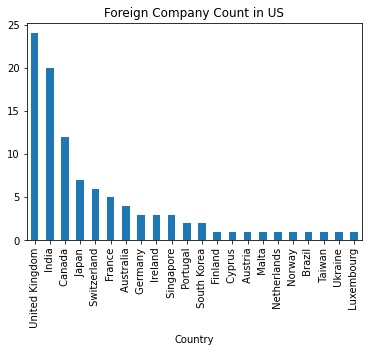

In [20]:
data.query('Company_origin == "Foreign"').groupby('Headquarters_state_or_country').agg({'Company_name_strip': "nunique"}).sort_values(
    by='Company_name_strip', ascending=False).plot(kind='bar', title="Foreign Company Count in US", legend = False).set(xlabel = 'Country')
plt.show()

In [21]:
# Let's see some Companies from India
data.query('Headquarters_state_or_country == " India"')['Company_name_strip'].unique()

array(['Cactus Holdings', 'EVMS', 'WB Technology', 'INSPIRE IT Solutions',
       'Easyfind Company', 'InvenTech Info', 'HCL Technologies Ltd.',
       'L&T Infotech', 'Corporate G. LLC', 'HCL America Inc.', 'Mindteck',
       'Calsoft Labs', 'Lean Data', 'Tata Consultancy Services',
       'SigmaWay', 'Saama', 'Subex', 'Wipro Ltd.',
       'Zen3 Infosolutions America Inc', 'CitiusTech'], dtype=object)

In [22]:
print('Mean Salary Lower limit of Indian Company in Us - ', data.query('Headquarters_state_or_country == " India"')['Salary_lowerlimit'].mean())
print('Mean Salary Upper limit of Indian Company in Us - ', data.query('Headquarters_state_or_country == " India"')['Salary_upperlimit'].mean())

Mean Salary Lower limit of Indian Company in Us -  53.370370370370374
Mean Salary Upper limit of Indian Company in Us -  87.18518518518519


Back to US

In [23]:
! pip install chart_studio

     |████████████████████████████████| 64 kB 1.2 MB/s 


In [24]:
import chart_studio.plotly as py 
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

df = data.State.value_counts().reset_index()

df2 = dict(type='choropleth',
            locations = df['index'],
            locationmode = 'USA-states',
            colorscale = 'reds',
            z = df['State'],
            colorbar = {'title':"Job Count"}
            )
layout = dict(title = 'Data Analytic Job',
              geo = dict(scope='usa')
             )
choromap = go.Figure(data = [df2],layout = layout)
iplot(choromap)

In [25]:
df = data.groupby('State').agg({'Salary_lowerlimit':'mean', 'Salary_upperlimit':"mean"}).reset_index()
df2 = dict(type='choropleth',
            locations = df['State'],
            locationmode = 'USA-states',
            colorscale = "reds",
            z = df['Salary_upperlimit'],
            colorbar = {'title':"Salary Mean"},)

layout = dict(title = 'Data Analytic Mean Salary',
              geo = dict(scope='usa')
             )
choromap = go.Figure(data = [df2],layout = layout)
iplot(choromap)

In [26]:
df = data.groupby(['State']).agg({'Rating': 'mean'}).reset_index()
df2 = dict(type='choropleth',
            locations = df['State'],
            locationmode = 'USA-states',
            colorscale = "reds",
            z = df['Rating'],
            colorbar = {'title':"Rating"},)

layout = dict(title = 'Data Analytic Companies Mean Rating',
              geo = dict(scope='usa')
             )
choromap = go.Figure(data = [df2],layout = layout)
iplot(choromap)

In Gorgia, average rating of company is 4.8, but job count and average salary is kind of lowest <br>
In California, average rating of company is 3.2, and job count and average salary is highest.

### Employees

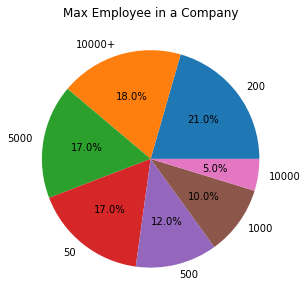

In [27]:
data['Max_size'] = data.Size.str.split(" employees").str.get(0).str.split(' to ').apply(lambda x: x[-1] if len(x) > 1 else x[0])


oddoneout = data.query('Max_size == "-1"')['Company Name'].unique()
data[data['Company Name'].isin(oddoneout)].Max_size.value_counts()  ## one of the company has 50 employees


## updating max size
company = data[data['Company Name'].isin(oddoneout)].query('Max_size == "50"')['Company Name'].iloc[0]
oddoneout = data.query('Max_size == "-1"').groupby('Company Name').get_group(company).index[0]
data.loc[oddoneout, "Max_size"] ="50"


df = data.Max_size.value_counts(normalize=True)*100

df.drop(df.index[[6, 8]], inplace=True) # some company employee records are unknown and some bymistake -1


df.plot.pie(title='Max Employee in a Company',
            autopct=lambda x: f"{round(x)}%", figsize=(5, 5)).set(ylabel="")
plt.show()


### Founded

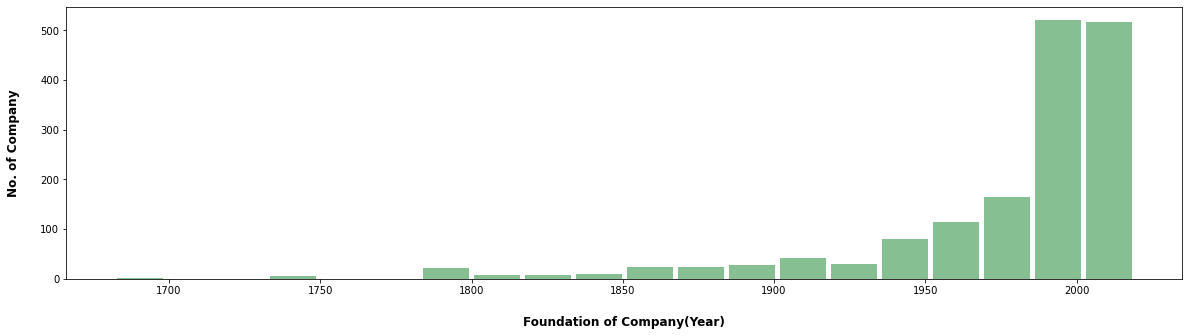

In [28]:
data.query('Founded != "-1"').Founded.hist(bins=20, grid=False, figsize=(20,5), color='#86bf91', zorder=2, rwidth=0.9)
plt.xlabel("Foundation of Company(Year)", labelpad=20, weight='bold', size=12)
plt.ylabel("No. of Company", labelpad=20, weight='bold', size=12)
plt.show()

In [29]:
age_bins = [0,1900, 1950,2000 , 2010]
labels = ["1900 and below", "1901 - 1950", " 1951 - 2000", "2000-2010"]
data['company_founded'] = pd.cut(data['Founded'], age_bins, labels=labels)


df = data.groupby(['State', 'company_founded']).size().groupby('State').cumsum().reset_index()
df.head()  # cummulative sum of no. of companies in a state

,State,company_founded,0
0,AZ,1900 and below,8
1,AZ,1901 - 1950,16
2,AZ,1951 - 2000,46
3,AZ,2000-2010,66
4,CA,1900 and below,12


In [30]:
data_slider = []
for year_category in df['company_founded'].unique():
    df_year = df[df['company_founded'] == year_category]
    data_one_year = dict(
                        type='choropleth',
                        locations = df_year['State'],
                        z=df_year[0].astype(float),
                        locationmode = 'USA-states',
                        colorscale = "reds",
                        colorbar = {'title':'Count'}
                        )
    data_slider.append(data_one_year)
    
steps = []

for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='Year {}'.format(labels[i]))
    step['args'][1][i] = True
    steps.append(step)

sliders = [dict(active=0, pad={"t": 1}, steps=steps)] 

layout = dict(title = 'Data Analytic Companies Founded', 
              geo=dict(scope='usa'), sliders=sliders)

fig = dict(data=data_slider, layout=layout)
iplot(fig, show_link = True)


With Years, in CA no. of companies drastically increases.

### Ownership

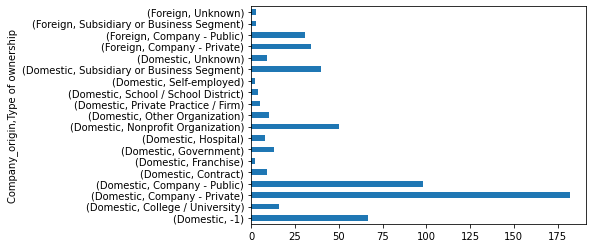

In [31]:
data.groupby(['Company_origin', 'Type of ownership'])['Location'].nunique().plot(kind = 'barh')
plt.show()

Foreign Public Companies are also in US

### Sector

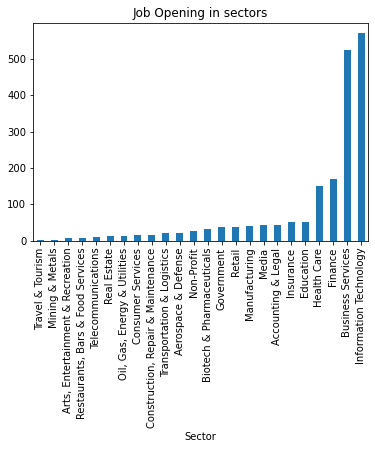

In [32]:
data.groupby('Sector').size()[1:].sort_values().plot(kind = 'bar', title= 'Job Opening in sectors')
plt.show()

In [33]:
data.query('Sector != "-1"').groupby('Sector').agg({'Salary_lowerlimit': ['size', 'mean', 'median', 'max', 'min'], 'Salary_upperlimit': [
    'mean', 'median', 'max', 'min']}).sort_values(by=('Salary_lowerlimit', 'size'), ascending=False)

Salary_lowerlimit                         \
                                                size       mean median  max   
Sector                                                                        
Information Technology                           570  55.298246   51.0  113   
Business Services                                524  54.507634   50.0  113   
Finance                                          169  50.644970   46.0   99   
Health Care                                      151  55.364238   48.0  113   
Education                                         52  51.807692   52.0   76   
Insurance                                         51  54.901961   46.0  113   
Accounting & Legal                                43  58.511628   55.0  113   
Media                                             42  51.833333   45.5  113   
Manufacturing                                     40  56.250000   50.5  110   
Retail                                            38  49.078947   46.0   99   
Government                                        36  48.055556   47.0   93   
Biotech & Pharmaceuticals                         33  61.363636   63.0   97   
Non-Profit                                        26  49.115385   46.5   73   
Aerospace & Defense                               22  51.954545   49.5   76   
Transportation & Logistics                        20  53.400000   51.5   97   
Construction, Repair & Maintenance                16  53.812500   49.5  113   
Consumer Services                                 14  53.142857   46.0   89   
Oil, Gas, Energy & Utilities                      13  48.000000   49.0   77   
Real Estate                                       12  57.250000   52.0   99   
Telecommunications                                11  51.727273   53.0   78   
Restaurants, Bars & Food Services                  8  39.000000   39.0   48   
Arts, Entertainment & Recreation                   7  60.428571   60.0  110   
Mining & Metals                                    1  41.000000   41.0   41   
Travel & Tourism                                   1  57.000000   57.0   57   

                                       Salary_upperlimit                  
                                   min              mean median  max min  
Sector                                                                    
Information Technology              24         93.196491   88.0  190  38  
Business Services                   24         90.036260   87.0  190  38  
Finance                             24         84.644970   82.0  178  38  
Health Care                         24         90.251656   87.0  190  38  
Education                           26         87.326923   83.5  127  44  
Insurance                           27         85.607843   85.0  132  42  
Accounting & Legal                  28         91.930233   89.0  190  38  
Media                               24         85.119048   83.5  132  45  
Manufacturing                       26         87.900000   82.0  190  38  
Retail                              24         84.289474   84.0  178  44  
Government                          24         80.583333   77.0  159  38  
Biotech & Pharmaceuticals           27        104.848485  113.0  159  52  
Non-Profit                          27         82.423077   77.0  120  52  
Aerospace & Defense                 34         85.045455   86.0  124  44  
Transportation & Logistics          28         85.300000   80.0  129  42  
Construction, Repair & Maintenance  27         88.125000   88.5  132  52  
Consumer Services                   35         89.857143   83.5  151  45  
Oil, Gas, Energy & Utilities        26         78.538462   67.0  132  38  
Real Estate                         29        104.583333  103.0  178  38  
Telecommunications                  24         89.000000  100.0  123  38  
Restaurants, Bars & Food Services   29         69.000000   71.0   88  38  
Arts, Entertainment & Recreation    24        100.857143   85.0  190  48  
Mining & Metals           

### Revenue

In [34]:
revenue_high = {
    'Unknown / Non-Applicable': 0,
     '$100 to $500 million (USD)' : 500,
     '$50 to $100 million (USD)' : 100,
     '$10+ billion (USD)' : 10000,
     '-1' : 0,
     '$10 to $25 million (USD)' : 25,
     '$2 to $5 billion (USD)' : 5000,
     '$1 to $5 million (USD)' : 5,
     '$25 to $50 million (USD)' : 50,
     'Less than $1 million (USD)' : 1,
     '$1 to $2 billion (USD)' : 2000,
     '$500 million to $1 billion (USD)' : 1000,
     '$5 to $10 million (USD)' : 10,
     '$5 to $10 billion (USD)' : 10000   
}

data["Revenue_millions"] = data.Revenue.map(revenue_high)

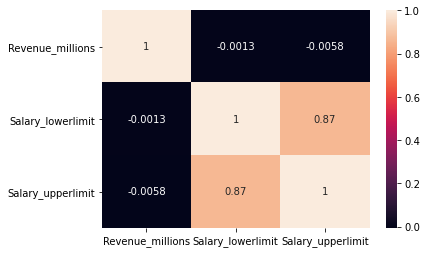

In [35]:
# correlation - revenue and salary
import seaborn as sns
sns.heatmap(data.query('Revenue_millions != 0').loc[:, [
            'Revenue_millions', 'Salary_lowerlimit', 'Salary_upperlimit']].corr(), annot=True)
plt.show()

NO Correlation!!!!

In [36]:
data.query('Revenue_millions != 0').groupby('Revenue_millions').agg({'Salary_lowerlimit': ['size', 'mean', 'median', 'max', 'min'], 'Salary_upperlimit': [
    'mean', 'median', 'max', 'min']}).sort_index()

Salary_lowerlimit                             \
                              size       mean median  max min   
Revenue_millions                                                
1                               93  53.602151   48.0  113  24   
5                              111  56.423423   51.0  110  26   
10                              72  53.625000   50.5  113  26   
25                             132  52.416667   49.0  113  26   
50                             110  55.136364   52.0  110  26   
100                            199  52.211055   46.0  113  24   
500                            218  54.041284   49.5  113  24   
1000                            79  51.569620   51.0   99  24   
2000                            87  55.011494   51.0  113  24   
5000                           129  53.643411   51.0  113  26   
10000                          245  53.600000   50.0  113  24   

                 Salary_upperlimit                  
                              mean median  max min  
Revenue_millions                                    
1                        88.204301   87.0  178  38  
5                        95.459459   91.0  190  38  
10                       87.277778   86.0  190  42  
25                       88.689394   86.0  190  38  
50                       94.109091   88.5  190  42  
100                      85.457286   76.0  190  38  
500                      89.619266   86.0  190  38  
1000                     88.088608   87.0  178  44  
2000                     85.643678   88.0  132  38  
5000                     89.945736   86.0  190  38  
10000                    88.812245   86.0  190  38

Max and Minimum Salary is same despite Company Revenue

Job Despription

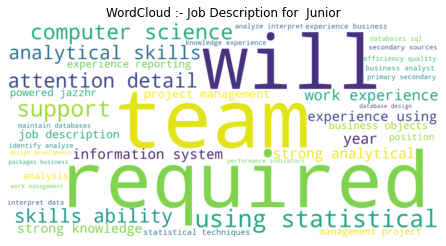

In [37]:
from wordcloud import WordCloud, STOPWORDS

def wordcloudplot(category):
    stopwords = set(STOPWORDS)
    text = " ".join(review for review in data[data.experience == category]['Job Description'].str.lower())
    text = " ".join([i.strip() for i in text.split(" ") if i.lower().strip() not in ['job', 'description', 'data', 'analyst', 'analysis', 'analytic']+ list(stopwords)])
    wordcloud = WordCloud(width=1600, height=800, background_color='white',max_words=150,prefer_horizontal=1,
                          stopwords=stopwords, min_font_size=20).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'WordCloud :- Job Description for  {category}')
    plt.tight_layout(pad=0)
    plt.show()


category = 'Junior'
wordcloudplot(category)

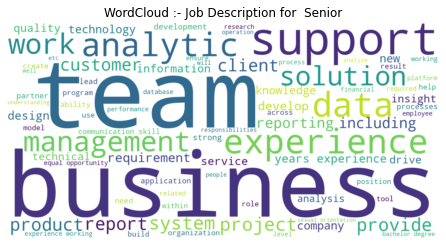

In [38]:
category = 'Senior'
wordcloudplot(category)

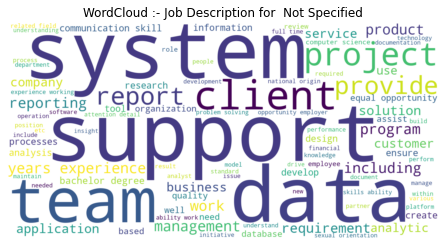

In [39]:
category = 'Not Specified'
wordcloudplot(category)

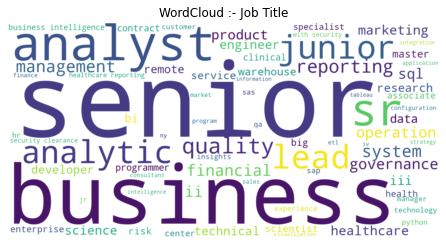

In [40]:
stopwords = set(STOPWORDS)
text = " ".join(review for review in data['filter1'].str.lower())
wordcloud = WordCloud(width=1600, height=800, background_color='white',max_words=300,prefer_horizontal=1,
                          stopwords=stopwords, min_font_size=20).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(f'WordCloud :- Job Title')
plt.tight_layout(pad=0)
plt.show()

IF you like my work DO UPVOTE